## 시계열 데이터
- 한글 헤더 읽기 EUC_KR

In [2]:
lines[5:20]

['2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n',
 '2006/1/6,2.1,8,1\n',
 '2006/1/7,2.8,8,1\n',
 '2006/1/8,4.2,8,1\n',
 '2006/1/9,3.7,8,1\n',
 '2006/1/10,4.3,8,1\n',
 '2006/1/11,6.1,8,1\n',
 '2006/1/12,6.1,8,1\n',
 '2006/1/13,4,8,1\n',
 '2006/1/14,6.6,8,1\n',
 '2006/1/15,10.7,8,1\n']

In [3]:
n_lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]
n_lines = map(lambda v: v.replace('/', ','), n_lines)
result = "".join(n_lines).strip()
print(result)

연,월,일,기온,품질,균질
2006,1,1,3.6,8,1
2006,1,2,4,8,1
2006,1,3,3.7,8,1
2006,1,4,4,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9,8,1
2006,1,17,8,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7,8,1
2006,2,18,4.4,8,1
2006,2,19,7,8,1
2006,2,20,6.4,8,1
2006,2,21,8,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,25,7.8,8,1
2006,2,26,7.5,8,

In [4]:
with open("new_data.csv", "wt", encoding="utf-8") as fw:
    fw.write(result)

In [113]:
import pandas as pd
df = pd.read_csv('new_data.csv', encoding="utf-8")
df.shape

(4018, 6)

### 일별 평균 기온

In [6]:
# 날짜별 기온을 리스트에 넣기 ---(*2)
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['월']), int(row['일']), float(row['기온']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 날짜별 평균 구하기 ---(*3)
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [7]:
avs["11/4"]

15.281818181818181

### 월별 평균 기온

In [8]:
import matplotlib.pyplot as plt
g = df.groupby(['월'])["기온"]
gg = g.sum() / g.count()
# 결과 출력하기 ---(*3)
print(gg)
gg.plot()
plt.savefig("tem-month-avg.png")
plt.show()

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


<Figure size 640x480 with 1 Axes>

In [9]:
g.count()

월
1     341
2     311
3     341
4     330
5     341
6     330
7     341
8     341
9     330
10    341
11    330
12    341
Name: 기온, dtype: int64

### 머신러닝을 이용한 예측
- 2015년 이전 데이터로 학습
- 2016년 데이터로 테스트
- 이전 n일의 데이터를 기반으로 다음날 기온을 예측
- 선형 모델 사용

In [122]:
df

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
5,2006,1,6,2.1,8,1
6,2006,1,7,2.8,8,1
7,2006,1,8,4.2,8,1
8,2006,1,9,3.7,8,1
9,2006,1,10,4.3,8,1


In [127]:
from sklearn.linear_model import LinearRegression

train_year = (df["연"] <= 2014)
test_year = (df["연"] >= 2015)
# interval=720

In [128]:
train_year.shape, test_year.shape

((4018,), (4018,))

In [129]:
interval

1

In [ ]:
def make_data(data):
    x = []
    y = []
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

In [137]:
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [138]:
interval=100

In [139]:
df[train_year].shape[0]+ df[test_year].shape[0]

4018

In [140]:
len(train_x) + len(test_x)

3818

In [83]:
df[train_year][-10:], train_x[-10:], train_y[-10:]

(         연   월   일    기온  품질  균질
 3642  2015  12  22  11.0   8   2
 3643  2015  12  23   6.8   8   2
 3644  2015  12  24  10.3   8   2
 3645  2015  12  25  10.9   8   2
 3646  2015  12  26   8.5   8   2
 3647  2015  12  27   7.3   8   2
 3648  2015  12  28   6.0   8   2
 3649  2015  12  29   6.3   8   2
 3650  2015  12  30   7.2   8   2
 3651  2015  12  31   6.6   8   2,
 [[9.6,
   7.3,
   5.9,
   6.5,
   5.4,
   5.3,
   5.5,
   7.3,
   7.2,
   3.6,
   4.3,
   5.3,
   5.1,
   4.2,
   3.0,
   4.8,
   5.8,
   5.2,
   4.2,
   4.8,
   6.3,
   5.5,
   6.5,
   7.2,
   8.4,
   9.5,
   4.6,
   8.8,
   8.9,
   10.3,
   9.9,
   7.9,
   9.3,
   12.8,
   5.0,
   1.6,
   2.7,
   4.0,
   0.3,
   5.4,
   6.0,
   3.3,
   4.8,
   5.3,
   1.4,
   3.9,
   6.9,
   7.3,
   4.7,
   4.7,
   4.6,
   5.5,
   5.1,
   5.6,
   6.3,
   8.2,
   10.0,
   10.0,
   13.8,
   8.9,
   5.6,
   6.6,
   6.9,
   6.5,
   5.4,
   4.4,
   5.9,
   6.4,
   4.9,
   6.1,
   11.0,
   12.3,
   10.1,
   8.3,
   10.8,
   12.1,
   15.4

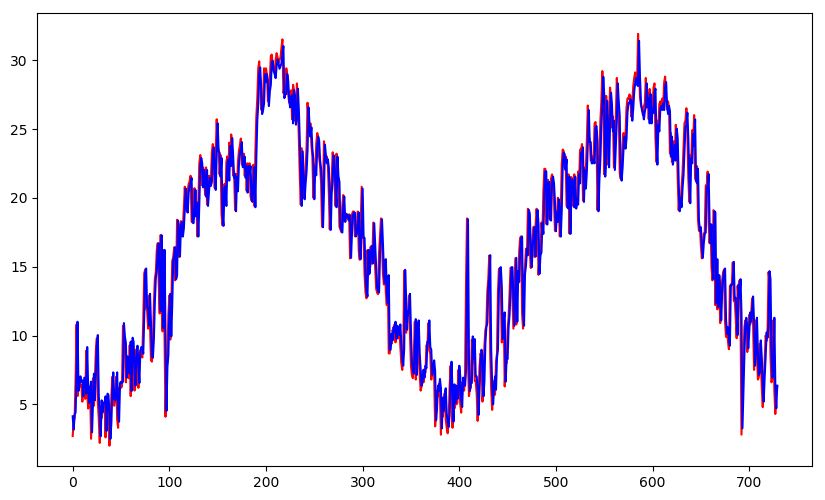

In [103]:
# 학습하기
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 학습하기
pre_y = lr.predict(test_x) # 예측하기

# 결과를 그래프로 그리기
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

In [104]:
diff_y = abs(pre_y  - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))
lr.score(test_x, test_y)

average= 1.6239391758640414
max= 10.341358591181601


0.9257366007517821

In [75]:
len(test_y)

361

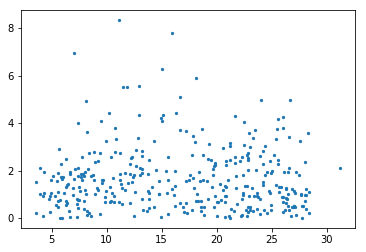

In [77]:
plt.scatter(pre_y, diff_y, s=5)

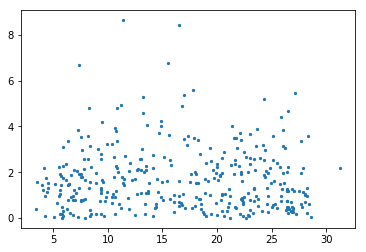

In [17]:
plt.scatter(pre_y, diff_y, s=5)

In [105]:
interval =1
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 학습하기
pre_y = lr.predict(test_x) # 예측하기
diff_y = abs(pre_y  - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))
lr.score(test_x, test_y)

average= 1.6239391758640414
max= 10.341358591181601


0.9257366007517821

In [78]:
for interval in range(1,12):
    train_x, train_y = make_data(df[train_year])
    test_x, test_y = make_data(df[test_year])
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y) # 학습하기
    print(interval, lr.score(test_x, test_y))

1 0.916555363635416
2 0.9165812019818895
3 0.9199006990740651
4 0.9215274488988293
5 0.9223245451890143
6 0.923475843513415
7 0.924458804907991
8 0.925395183956023
9 0.9248171646161317
10 0.92476342971837
11 0.924513132254838


In [106]:
lr.coef_, lr.intercept_

(array([0.96673154]), 0.5568251166490334)